# Regularization

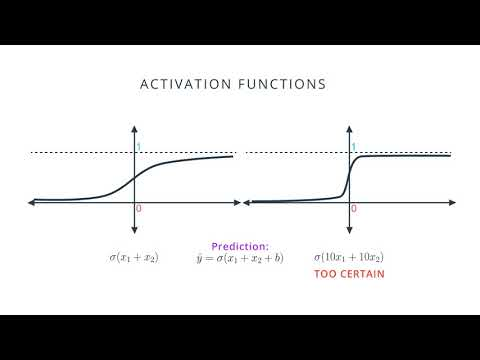

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('KxROxcRsHL8')

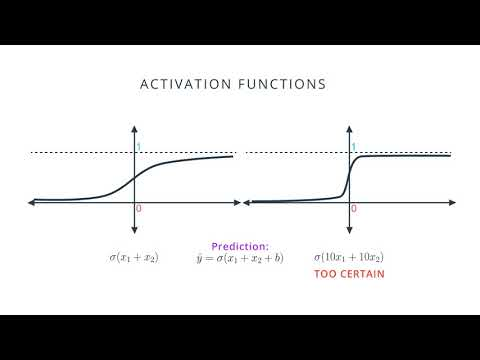

In [3]:
YouTubeVideo('ndYnUrx8xvs')

![1](http://postfiles6.naver.net/MjAxODAxMjlfOTEg/MDAxNTE3MjMwMjc2MzU4.4ndmv6A2ctvN-7EP0bgFC2690a2IFALcPn62f5JEy00g.RGyGTFcoU9LXzhYw16UZc6ZfoWS9W_AYdZPVsjkZkdwg.PNG.infoefficien/5._Regularization_.mp4_000048671.png?type=w773)

파란 점과 빨간 점을 나누는 line을 구할 때 Solution1,2 중 어떤 모델의 Error가 작을까요?  
일단 Solution 1, 2의 line은 둘다 같은 line을 가집니다.

![2](http://postfiles13.naver.net/MjAxODAxMjlfNzMg/MDAxNTE3MjMwOTk5MzE4.A7cQbAz643Z4n9gEtOZANa2yLYtoZypD9_0NOkAMRd4g._K7ASei1cml7Pge8WpHtHEes0oO-UJO7bU5qan9lmK8g.PNG.infoefficien/6._Regularization.mp4_000102031.png?type=w773)

하지만 Prediction을 구해보면 상황은 다릅니다. Solution1 모델에 파란점 (1, 1)과 빨간점 (-1, -1)을 sigmoid에 대입한 결과와 동일 방법으로 Solution2 모델에 대입한 결과 값은 차이가 많이 납니다.<br>
앞에서 배웠듯이 최적해를 구하기 위해 Error를 최소화 해야하고 Error를 최소화 하기 위해서는 Maximum likelihood에 따라서 모든 이벤트의 발생 확률이 높도록 모델을 설정해 주어야 합니다. 위에서 Solution1과 Solution2의 모델을 각각 적용하여 CE(Cross Entropy)를 구하면 Solution2의 CE값이 좀 더 M.L에 가까우므로 Solution2의 Error가 더 작다고 할 수 있습니다. (즉, label = 1인 blue 포인트의 확률은 좀 더 1에 가깝고, label = 0인 red 포인트의 확률은 좀 더 0에 가깝습니다.)<br>
그러면 Solution2가 항상 Solution1보다 좋다고 할 수 있을까요? 즉, 최적화 되었다고 할 수 있을까요?

정답은 아닙니다. 사실 여기에는 다른 문제가 남아있습니다.

![3](http://postfiles7.naver.net/MjAxODAxMjlfMTMw/MDAxNTE3MjM2NTAwNDA5.SEQyrOjWKEYPii30Omwf53xHGfd3xNq7r3lxXDZEd9Mg.sUzX3f29CCVlQ0YeqxBwKUTisySBCO1psamCZxYcPu0g.PNG.infoefficien/6._Regularization.mp4_000144533.png?type=w773)

Solution2 = 10 x Solution1 입니다. weight의 차이로 인하여 Solution2의 sigmoid 출력값(예측값)은 Solution1에 비하여 정답(blue)이라고 생각하는 점은 1에 가깝고, 오답(red)라고 생각하는 점은 0에 가깝습니다. 하지만 여기서는 Solution2가 더 나쁠 수 있다고 설명합니다.
왜 Solution1이 Solution2에 비하여 ML이 좋지 않음에도 좋은 모델이 될 수 있는지 설명드리겠습니다. 왼쪽의 Solution1 모델과 오른쪽의 Solution2 모델에 sigmoid를 적용한 그래프를 보면 기울기가 다릅니다. 왼쪽 그래프에 비하여 오른쪽 그래프는 x = 0 주위로 급격한 기울기를 가집니다. 그리고 x의 값이 점점 커지거나 작아질수록 기울기가 0에 급격히 가까워 집니다. 학습을 하기 위해서는 gradient 값이 중요한데 오른쪽 모델 같은 경우에는 gradient가 급격하게 0에 수렴하게 되어 학습이 제대로 이루어 지지 않습니다. 만약 오른쪽 모델을 선택 하였을 때, 점들이 오 분류되어있다면 학습을 통하여 모델을 수정하기가 어려워져 Error가 줄어들지 않게 됩니다.   

![4](http://postfiles1.naver.net/MjAxODAxMjlfMTQy/MDAxNTE3MjM3NzAyNTAy.zUMOeZ0C1YIiWeusy65nBldPvfsSqskXrgqpItSclJwg.HzERQI_-l28eagp3advDBvEIi0RVZ9Os6UC0VPuRGVsg.PNG.infoefficien/6._Regularization.mp4_000191774.png?type=w773)

이 문제를 간단히 정리하면 large coefficient로 인하여 overfitting이 발생한 것이라고 할 수 있습니다. coefficient가 크면 클수록 기존 데이터에 최적화 되고 학습이 잘 되지 않기 때문입니다. 그러면 이 문제를 어떻게 해결해야 할까요?

![5](http://postfiles2.naver.net/MjAxODAxMjlfMTk0/MDAxNTE3MjM3ODg5NjIy.2ITcGqOcL73MHCi9soR-_s2CDGhfYGgQzbo-EPPAs40g.YFs_UVVQLZojWgDgwRuQD5eeoxNS5An7gjVA-I42oAIg.PNG.infoefficien/6._Regularization.mp4_000256256.png?type=w773)

기본적인 컨셉은 큰 coefficient 즉, weight에 페널티를 주는 것 입니다. 
페널티를 주는 방법은 위와 같이 Error에 coefficient에 해당하는 weight들을  더해주는 것입니다. 이 때 $\lambda$는 얼마나 페널티를 줄 지 정하게 됩니다.

![6](http://postfiles8.naver.net/MjAxODAxMzBfMjQ0/MDAxNTE3MjQwMjg2ODM1.aIx5_z9-0fxDT9ru4QfudIdQsL2GYfg_ttR7xmOdaEQg.MckDjcBzGHeDUs5E4ut6yyWwkhr2ReE76WSq7g3-0t8g.PNG.infoefficien/6._Regularization.mp4_000359130.png?type=w773)

L1과 L2 regularization을 선택하는 기준을 무엇일까요? <br>
L1을 적용 하면, vector들이 sparse vector가 되는 경향이 있습니다. 즉 작은 weight 값은 0이 되어버리는 것입니다. 따라서 weight의 수를 줄이고 small set을 만들고 싶으면, L1을 사용하면 됩니다. 따라서 L1을 이용하면 Feature(특정 weight)를 선택하여 사용할 수 있습니다. <span class="mark">weight가 너무 많을 때 좀 더 중요한 weight만 선택하게 되고 나머지 weight는 0으로 되는 효과</span>를 얻을 수 있습니다. 

L2는 sparse vector를 만드는 것은 아닙니다. 대신 <span class="mark">모든 가중치를 균등하게 작게 유지</span>하려고 합니다. 이 모델은 일반적으로 <span class="mark">학습시 더 좋은 결과</span>를 만듭니다. <span class="mark">따라서 학습할 때에는 대부분 L2 모델을 사용</span>할 것입니다. 

왜 L1은 sparse vector를 만들고 L2는 균등하게 작은 weight들을 만들까요? <br>
만약 (1, 0) vector가 있을 때, L1으로 계산하면 |1| + |0| = 1이 되고 L2로 계산하여도 1 + 0 = 1이 됩니다. 반면 (0.5, 0.5) vector가 있을 때, L1으로 계산하면 |0.5| + |0.5| = 1이 되지만 L2로 계산하면 0.5^2 + 0.5 ^2 = 0.25 + 0.25 = 0.5가 됩니다. 값이 균등하게 작을 때에는 L2의 값이 더 작아지게 됩니다. 따라서 Error에 더 작은 penalty를 주게 됩니다. <br>
Regularization에서는 L1, L2 연산한 값을 Error에 더하므로 연산 결과가 작은 값을 선호합니다. 따라서 (0.5, 0.5)일 때에는 L2 연산을 Error가 선호하게 되는 것입니다.

![7](http://postfiles15.naver.net/MjAxODAyMDZfMjAy/MDAxNTE3OTI1NTcwMjM3.wicIsMlXPMzBjkhx4t8PACQxlGioI7XRNj434zlFBjYg.SClIfjS6sC7FdkU13n_7FyRICPd3qJgCmoLzHe6vFsYg.JPEG.infoefficien/main-qimg-50f07d3c0545ec53f9840c7b20bcd003-c.jpg?type=w773)

L1과 L2를 그래프 관점에서 바라보겠습니다. 앞에서 설명한 바와 같이 L1, L2 Regularization은 Error 값을 증가시켜서 최적화 하는데 제약을 주게 됩니다. <br>
파라미터가  x1, x2로 2개일 때, 왼쪽 곡선은 L1 Regularization의 분포를 나타내고 오른쪽 곡선은 L2 Regularization의 분포를 나타냅니다. <br>
위 그래프에서 H0를 Error 값을 최적화 시키는 solution이라고 가정합시다.<br>
이 때, L1 또는 L2 Regularization의 분포와 H0가 한점에서 접하는 지점이 최적화 하는 해가 됩니다. 
L1 Regularization을 좌표평면에 나타내면 왼쪽 마름모 형태의 분포와 같고 H0와 한점에서 만나는 지점은 끝 모서리가 됩니다. 끝 모서리에서 solution을 찾았다는 것은 solution의 값 중 하나는 0이 되었다는 것입니다. 즉, 절대값 함수의 형태로 인하여 sparse vector가 생성되게 됩니다.

L2 Regularization을 좌표평면에 나타내면 오른쪽 원의 형태와 같고 H0와 한점에서 만나는 지점은 원에 접하는 모든 부분이 됩니다. 

![8](http://postfiles7.naver.net/MjAxODAyMDZfMTM4/MDAxNTE3OTI3NjA2Nzk3.vosJ6WtSd1Ahbt6g_YI1WlW0hqvU-pQFssVqvUxpD1og.1KdXy67J5q2UO38734IZefJUODb2_o8ipfG5zhp1ZIgg.PNG.infoefficien/image.png?type=w773)

다시 정리하면 <span class="mark">L1 Regularization을 이용하면 weight가 sparse해지고 L2 Regularization을 이용하면 균등하게 작은 값들로 weight로 업데이트가 됩니다.</span> 그 이유는 L1의 경우 해가 모서리 부분에서 발생할 수 있어 일부 값들이 0이 되기 때문이고 L2의 경우 L1 분포에 내접하는 원의 형태로 weight가 분포하므로 L1보다 작은 값들로 구성되게 됩니다.